# Árvores Geradoras

Uma **árvore geradora** (ou árvore geradora mínima, em alguns contextos) é um subgrafo de um grafo conexo e não direcionado que inclui todos os vértices do grafo original e é uma árvore (ou seja, é conexa e acíclica).  
Principais características:
- Contém todos os vértices do grafo original.
- Não possui ciclos.
- É conexa.
- Possui exatamente (n-1) arestas, onde n é o número de vértices.

Árvores geradoras são fundamentais em algoritmos de otimização, como os algoritmos de Kruskal e Prim, que buscam a árvore geradora de menor peso em grafos ponderados.

# Métodos construtivo e por remoção para encontrar árvores geradoras

Dado um grafo conexo $G$, podemos utilizar dois métodos diferentes para encontrar uma árvore geradora $T$:

**Método por construção:**  
Selecionamos arestas do grafo, uma de cada vez, tomando o cuidado para não formar ciclos. Repetimos o procedimento até que todos os vértices estejam incluídos.

*Exemplo:*  
No grafo $G$ da figura abaixo, selecionamos as arestas $(a, c)$, $(a, b)$ e $(a, d)$, obtendo a árvore geradora $T_1$.

![Árvore geradora por construção](attachment:arvore_construcao.png)

**Método por remoção:**  
Escolhemos um ciclo e removemos qualquer uma de suas arestas. Repetimos este procedimento até que não restem mais ciclos.

*Exemplo:*  
No mesmo grafo $G$, removemos a aresta $(c, d)$, destruindo o ciclo $acd$, em seguida removemos a aresta $(a, b)$ destruindo o ciclo $abd$ e obtendo a árvore geradora $T_2$.

![Árvore geradora por remoção](attachment:arvore_remocao.png)

# O que é um Grafo Conexo?

Um **grafo conexo** é um grafo não direcionado no qual existe pelo menos um caminho entre qualquer par de vértices.  
Em outras palavras, é possível ir de qualquer vértice a qualquer outro vértice do grafo, seguindo as arestas disponíveis.

Se um grafo não for conexo, ele é chamado de **grafo desconexo** e é composto por duas ou mais componentes conexas (subgrafos conexos independentes).

# Exemplo prático: Grafo conexo e sua árvore geradora mínima

No exemplo a seguir, criamos um grafo conexo ponderado utilizando a biblioteca NetworkX.  
O grafo representa um conjunto de vértices conectados por arestas com pesos (custos).  
Utilizamos o algoritmo de árvore geradora mínima para encontrar o subconjunto de arestas que conecta todos os vértices com o menor custo total possível, sem formar ciclos.

O código também exibe, lado a lado, o grafo original e a árvore geradora mínima encontrada.

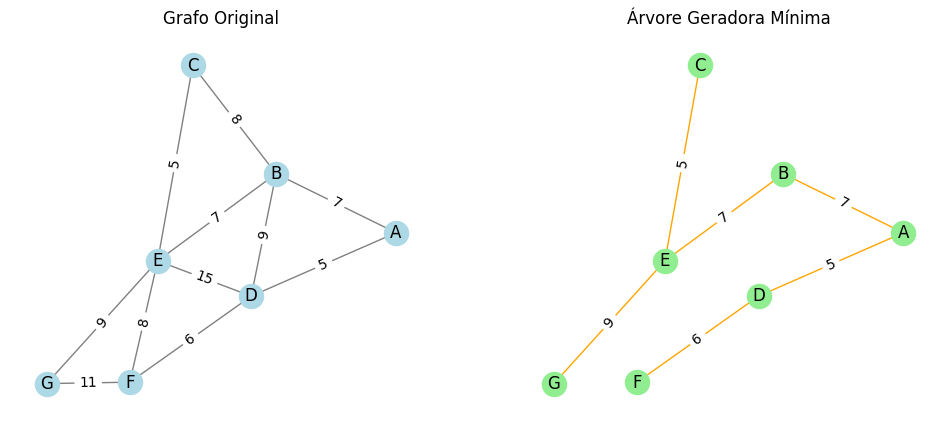

Vetor de roteamento (predecessores) a partir do vértice 'A':
A: raiz
B: A
C: E
D: A
E: B
F: D
G: E


In [155]:
import networkx as nx
import matplotlib.pyplot as plt

# Criando um grafo conexo ponderado
G = nx.Graph()
G.add_weighted_edges_from([
    ('A', 'B', 7),
    ('A', 'D', 5),
    ('B', 'C', 8),
    ('B', 'D', 9),
    ('B', 'E', 7),
    ('C', 'E', 5),
    ('D', 'E', 15),
    ('D', 'F', 6),
    ('E', 'F', 8),
    ('E', 'G', 9),
    ('F', 'G', 11)
])

# Encontrando a árvore geradora mínima
mst = nx.minimum_spanning_tree(G)

# Plotando o grafo original
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Grafo Original")

# Plotando a árvore geradora mínima
plt.subplot(1, 2, 2)
nx.draw(mst, pos, with_labels=True, node_color='lightgreen', edge_color='orange')
labels_mst = nx.get_edge_attributes(mst, 'weight')
nx.draw_networkx_edge_labels(mst, pos, edge_labels=labels_mst)
plt.title("Árvore Geradora Mínima")

plt.show()

# Exibindo o vetor de roteamento (predecessores) da árvore geradora mínima
# O vetor de roteamento mostra para cada vértice, qual é o seu predecessor na árvore geradora mínima.
# Usamos o resultado do algoritmo de busca em largura (BFS) a partir de um nó raiz, por exemplo, 'A'.

predecessors = nx.predecessor(mst, source='A')
print("Vetor de roteamento (predecessores) a partir do vértice 'A':")
for node in sorted(mst.nodes()):
    if node == 'A':
        print(f"{node}: raiz")
    else:
        # predecessor retorna uma lista, pegamos o primeiro elemento
        pred = predecessors[node][0] if predecessors[node] else None
        print(f"{node}: {pred}")

# Definição formal e exemplo de árvore geradora

**Definição 4 (Árvore geradora):**  
Seja $G$ um grafo conexo. Uma **árvore geradora** $T$ em $G$ é um subgrafo de $G$ que inclui todos os seus vértices e também é uma árvore.

**Exemplo:**  
Considere o grafo abaixo:

```
Grafo G:
A --- B
|   / |
|  /  |
C ----D
```

Uma possível árvore geradora $T$ para esse grafo é:

```
Árvore geradora T:
A --- B
|     
C     D
```

Neste exemplo, $T$ conecta todos os vértices de $G$ sem formar ciclos e utiliza o menor número possível de arestas.

# Exemplo em NetworkX: Construindo uma árvore geradora

Vamos ilustrar a definição de árvore geradora com um exemplo prático usando a biblioteca NetworkX.

Considere o seguinte grafo simples com quatro vértices:

- Os vértices representam pontos de uma rede.
- As arestas representam conexões possíveis entre esses pontos.

O objetivo é encontrar uma árvore geradora, ou seja, um subconjunto das conexões que liga todos os pontos sem formar ciclos.

No código abaixo, criamos o grafo, exibimos sua estrutura e destacamos uma árvore geradora encontrada automaticamente pelo NetworkX.

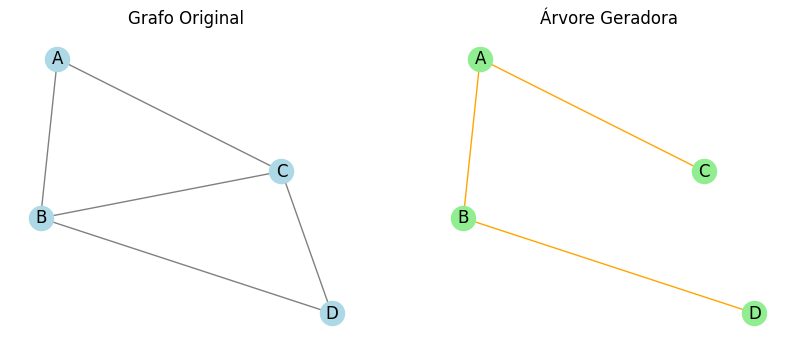

Vetor de roteamento (predecessores) a partir do vértice 'A' (exemplo simples):
A: raiz
B: A
C: A
D: B


In [156]:
import networkx as nx
import matplotlib.pyplot as plt

# Grafo exemplo (mesmo do exemplo textual)
G_ex = nx.Graph()
G_ex.add_edges_from([
    ('A', 'B'),
    ('A', 'C'),
    ('B', 'C'),
    ('B', 'D'),
    ('C', 'D')
])

# Encontrando uma árvore geradora
T_ex = nx.minimum_spanning_tree(G_ex)

# Plotando o grafo original e a árvore geradora
plt.figure(figsize=(10, 4))
pos_ex = nx.spring_layout(G_ex, seed=1)

plt.subplot(1, 2, 1)
nx.draw(G_ex, pos_ex, with_labels=True, node_color='lightblue', edge_color='gray')
plt.title("Grafo Original")

plt.subplot(1, 2, 2)
nx.draw(T_ex, pos_ex, with_labels=True, node_color='lightgreen', edge_color='orange')
plt.title("Árvore Geradora")

plt.show()

# Exibindo o vetor de roteamento (predecessores) da árvore geradora do exemplo simples
predecessors_ex = nx.predecessor(T_ex, source='A')
print("Vetor de roteamento (predecessores) a partir do vértice 'A' (exemplo simples):")
for node in sorted(T_ex.nodes()):
    if node == 'A':
        print(f"{node}: raiz")
    else:
        pred = predecessors_ex[node][0] if predecessors_ex[node] else None
        print(f"{node}: {pred}")

# Exemplo 6.4: Árvores geradoras do grafo de Petersen

A figura abaixo mostra o grafo de Petersen $P$ e três de suas árvores geradoras ($T_1$, $T_2$ e $T_3$):

![Árvores geradoras do grafo de Petersen](attachment:0e7c2e7e-1e8e-4e7e-8e7e-1e8e4e7e8e7e.png)

O grafo de Petersen é um grafo não direcionado com 10 vértices e 15 arestas, famoso em teoria dos grafos por suas propriedades e aplicações.

- Cada árvore geradora é um subgrafo de $P$ que conecta todos os vértices sem formar ciclos.
- Se o grafo for rotulado, ele possui exatamente 2000 árvores geradoras distintas.

Abaixo, mostramos como construir o grafo de Petersen com NetworkX e calcular o número de árvores geradoras usando a matriz laplaciana.

Número de árvores geradoras do grafo de Petersen: 2000


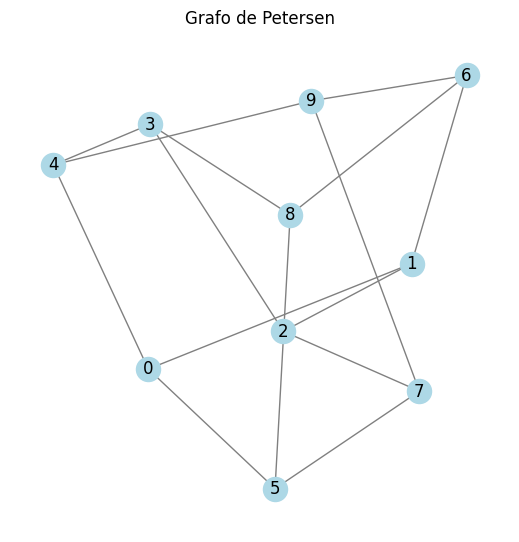

In [157]:
import networkx as nx
import numpy as np

# Grafo de Petersen
P = nx.petersen_graph()

# Número de árvores geradoras pelo Teorema de Kirchhoff (determinante da matriz laplaciana reduzida)
L = nx.laplacian_matrix(P).toarray()
# Remove a primeira linha e coluna para calcular o determinante da matriz reduzida
L_minor = L[1:, 1:]
num_arvores = round(np.linalg.det(L_minor))

print(f"Número de árvores geradoras do grafo de Petersen: {num_arvores}")

# Exibindo o grafo de Petersen
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
nx.draw(P, with_labels=True, node_color='lightblue', edge_color='gray')
plt.title("Grafo de Petersen")
plt.show()

# Métodos para encontrar uma árvore geradora

Dado um grafo conexo $G$, existem dois métodos intuitivos para encontrar uma árvore geradora $T$ em $G$:

**1. Método por construção:**  
Selecionamos arestas do grafo, uma de cada vez, tomando o cuidado para não formar ciclos. Repetimos o procedimento até que todos os vértices estejam incluídos na árvore.

Exemplo de passos do método construtivo:
- Escolha uma aresta qualquer.
- Adicione-a à árvore, desde que não forme um ciclo.
- Repita até que todos os vértices estejam conectados.


In [158]:
# Exemplo passo a passo dos métodos construtivo e por remoção usando NetworkX

import networkx as nx
import matplotlib.pyplot as plt

# Grafo base do exemplo
G_fig = nx.Graph()
G_fig.add_edges_from([
    ('a', 'b'),
    ('a', 'c'),
    ('a', 'd'),
    ('b', 'c'),
    ('c', 'd')
])

pos_fig = {'a': (0, 1), 'b': (-1, 0), 'c': (0, 0), 'd': (1, 0)}


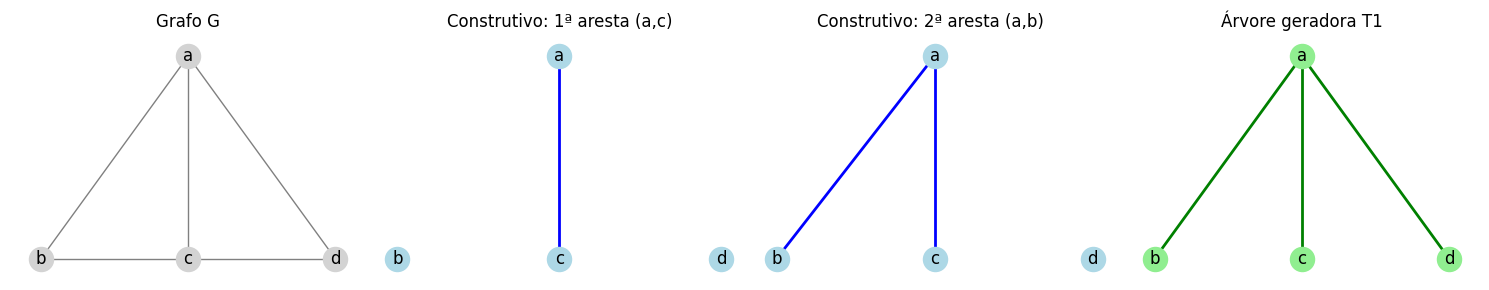

In [159]:

# --- Método construtivo ---
# Etapa 1: seleciona (a, c)
T1 = nx.Graph()
T1.add_nodes_from(G_fig.nodes())
T1.add_edge('a', 'c')

plt.figure(figsize=(15, 3))
plt.subplot(1, 4, 1)
nx.draw(G_fig, pos_fig, with_labels=True, node_color='lightgray', edge_color='gray')
plt.title("Grafo G")

plt.subplot(1, 4, 2)
nx.draw(T1, pos_fig, with_labels=True, node_color='lightblue', edge_color='blue', width=2)
plt.title("Construtivo: 1ª aresta (a,c)")

# Etapa 2: adiciona (a, b)
T1.add_edge('a', 'b')
plt.subplot(1, 4, 3)
nx.draw(T1, pos_fig, with_labels=True, node_color='lightblue', edge_color='blue', width=2)
plt.title("Construtivo: 2ª aresta (a,b)")

# Etapa 3: adiciona (a, d)
T1.add_edge('a', 'd')
plt.subplot(1, 4, 4)
nx.draw(T1, pos_fig, with_labels=True, node_color='lightgreen', edge_color='green', width=2)
plt.title("Árvore geradora T1")

plt.tight_layout()
plt.show()



**2. Método por remoção:**  
Começamos com todas as arestas do grafo e removemos, uma a uma, as arestas que formam ciclos, até que reste uma árvore que conecta todos os vértices.

Ambos os métodos garantem que a árvore geradora resultante seja conexa e acíclica, contendo todos os vértices do grafo original.

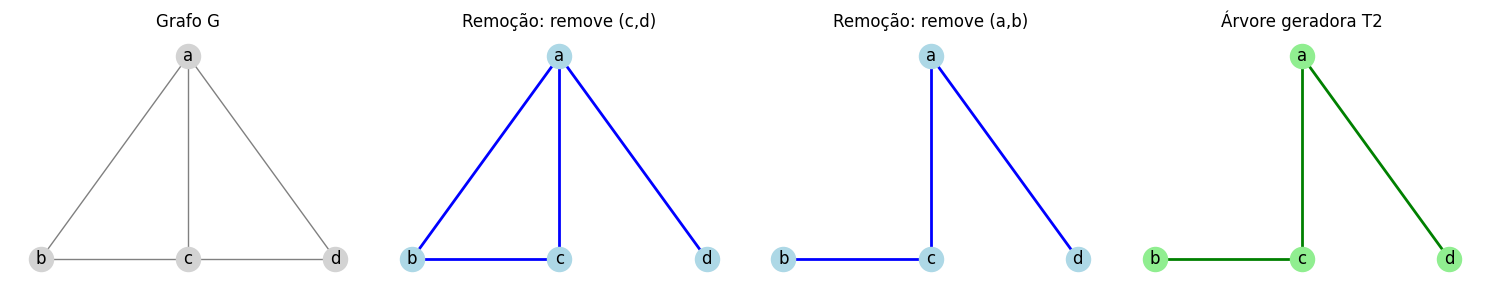

In [160]:
# --- Método por remoção ---
# Começa com o grafo completo
T2 = G_fig.copy()

plt.figure(figsize=(15, 3))
plt.subplot(1, 4, 1)
nx.draw(T2, pos_fig, with_labels=True, node_color='lightgray', edge_color='gray')
plt.title("Grafo G")

# Etapa 1: remove (c, d) (destrói ciclo acd)
T2.remove_edge('c', 'd')
plt.subplot(1, 4, 2)
nx.draw(T2, pos_fig, with_labels=True, node_color='lightblue', edge_color='blue', width=2)
plt.title("Remoção: remove (c,d)")

# Etapa 2: remove (a, b) (destrói ciclo abd)
T2.remove_edge('a', 'b')
plt.subplot(1, 4, 3)
nx.draw(T2, pos_fig, with_labels=True, node_color='lightblue', edge_color='blue', width=2)
plt.title("Remoção: remove (a,b)")

# Resultado final: árvore geradora T2
plt.subplot(1, 4, 4)
nx.draw(T2, pos_fig, with_labels=True, node_color='lightgreen', edge_color='green', width=2)
plt.title("Árvore geradora T2")

plt.tight_layout()
plt.show()

# Grafos valorados

Antes de estudarmos o problema das árvores geradoras de custo mínimo, precisamos conhecer o conceito de **grafo valorado**.

**Definição 5 (Grafo valorado):**  
Um **grafo valorado** é um grafo (dirigido ou não dirigido) no qual cada uma de suas arestas está associada a um valor numérico chamado **peso** ou **custo** da aresta.

Esses pesos podem representar distâncias, custos, capacidades, tempos ou qualquer outra medida relevante ao contexto do problema.

Exemplo de grafo valorado:

```
A ---5--- B
|         |
3         2
|         |
C ---4--- D
```

Neste exemplo, cada aresta possui um valor associado, representando o peso/custo daquela conexão.

O custo de uma aresta representa algum dado significativo do problema modelado pelo grafo.  
Este dado pode ser **distância**, **custo monetário**, **tempo**, ou qualquer outro parâmetro relevante que pode ser expresso como um valor numérico.

Dependendo do problema, podemos, inclusive, ter custos negativos.  
O custo de uma aresta $(v_i, v_j)$ pode ser denotado por $c_{i,j}$ (de "custo"), $d_{i,j}$ (de "distância") ou $w_{i,j}$ (da palavra "weight").

Um custo de valor infinito entre $v_i$ e $v_j$ representa ausência de aresta ou de caminho entre estes dois vértices.

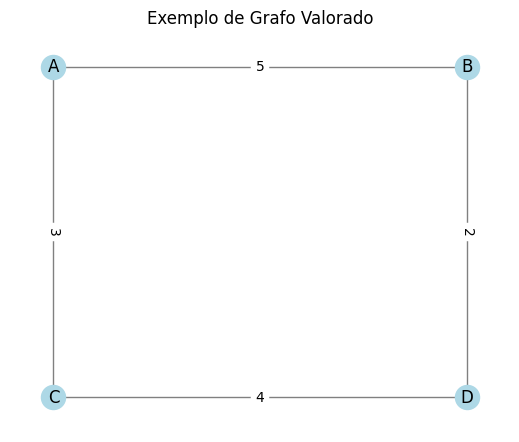

In [161]:
# Exemplo de grafo valorado no NetworkX

import networkx as nx
import matplotlib.pyplot as plt

G_val = nx.Graph()
G_val.add_weighted_edges_from([
    ('A', 'B', 5),
    ('A', 'C', 3),
    ('B', 'D', 2),
    ('C', 'D', 4)
])

pos_val = {'A': (0, 1), 'B': (2, 1), 'C': (0, 0), 'D': (2, 0)}

plt.figure(figsize=(5, 4))
nx.draw(G_val, pos_val, with_labels=True, node_color='lightblue', edge_color='gray')
labels_val = nx.get_edge_attributes(G_val, 'weight')
nx.draw_networkx_edge_labels(G_val, pos_val, edge_labels=labels_val)
plt.title("Exemplo de Grafo Valorado")
plt.show()

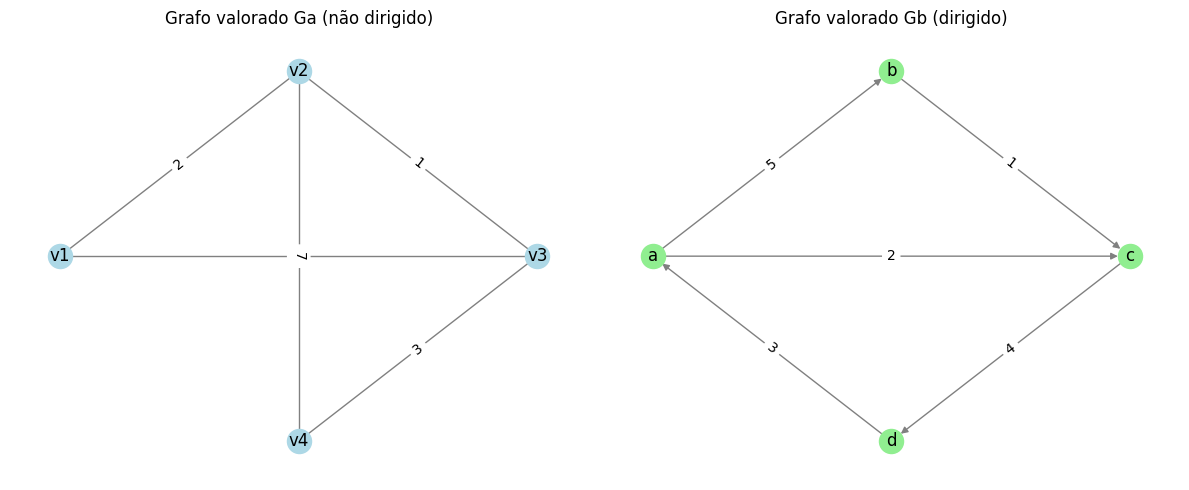

In [162]:
# Exemplos de grafos valorados Ga e Gb

import networkx as nx
import matplotlib.pyplot as plt

# Grafo Ga
Ga = nx.Graph()
Ga.add_weighted_edges_from([
    ('v1', 'v2', 2),
    ('v1', 'v3', 4),
    ('v2', 'v3', 1),
    ('v2', 'v4', 7),
    ('v3', 'v4', 3)
])
pos_Ga = {'v1': (0, 1), 'v2': (1, 2), 'v3': (2, 1), 'v4': (1, 0)}

# Grafo Gb
Gb = nx.DiGraph()
Gb.add_weighted_edges_from([
    ('a', 'b', 5),
    ('a', 'c', 2),
    ('b', 'c', 1),
    ('c', 'd', 4),
    ('d', 'a', 3)
])
pos_Gb = {'a': (0, 1), 'b': (1, 2), 'c': (2, 1), 'd': (1, 0)}

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
nx.draw(Ga, pos_Ga, with_labels=True, node_color='lightblue', edge_color='gray')
labels_Ga = nx.get_edge_attributes(Ga, 'weight')
nx.draw_networkx_edge_labels(Ga, pos_Ga, edge_labels=labels_Ga)
plt.title("Grafo valorado Ga (não dirigido)")

plt.subplot(1, 2, 2)
nx.draw(Gb, pos_Gb, with_labels=True, node_color='lightgreen', edge_color='gray', arrows=True)
labels_Gb = nx.get_edge_attributes(Gb, 'weight')
nx.draw_networkx_edge_labels(Gb, pos_Gb, edge_labels=labels_Gb)
plt.title("Grafo valorado Gb (dirigido)")

plt.tight_layout()
plt.show()

# Definição 6 (Matriz de custos)

Dado um grafo valorado $G = (V, E)$ com $n$ vértices, sua **matriz de custos** é uma matriz $W$ de tamanho $n \times n$, com elementos definidos da seguinte forma:

\[
w_{i,j} = 
\begin{cases}
0 & \text{se } v_i = v_j \\
\infty & \text{se } (v_i, v_j) \notin E \\
\text{custo} & \text{se } (v_i, v_j) \in E
\end{cases}
\]

Ou seja, cada elemento $w_{i,j}$ representa o custo (ou peso) da aresta entre os vértices $v_i$ e $v_j. Se não existe aresta entre $v_i$ e $v_j$, o valor é infinito. Se $i = j$, o valor é zero.

In [163]:
# Definição e exemplo de matriz de custos para grafos valorados

import numpy as np

# Matriz de custos para Ga
nodes_Ga = ['v1', 'v2', 'v3', 'v4']
Wa = np.full((4, 4), np.inf)
for i, u in enumerate(nodes_Ga):
    for j, v in enumerate(nodes_Ga):
        if u == v:
            Wa[i, j] = 0
        elif Ga.has_edge(u, v):
            Wa[i, j] = Ga[u][v]['weight']

print("Matriz de custos Wa (para Ga):")
print("     ", "  ".join(nodes_Ga))
for i, u in enumerate(nodes_Ga):
    row = []
    for j in range(4):
        val = Wa[i, j]
        if val == np.inf:
            row.append("∞")
        else:
            row.append(str(int(val)))
    print(f"{u}:  {'  '.join(row)}")

# Matriz de custos para Gb (direcionado)
nodes_Gb = ['a', 'b', 'c', 'd']
Wb = np.full((4, 4), np.inf)
for i, u in enumerate(nodes_Gb):
    for j, v in enumerate(nodes_Gb):
        if u == v:
            Wb[i, j] = 0
        elif Gb.has_edge(u, v):
            Wb[i, j] = Gb[u][v]['weight']

print("\nMatriz de custos Wb (para Gb):")
print("     ", "  ".join(nodes_Gb))
for i, u in enumerate(nodes_Gb):
    row = []
    for j in range(4):
        val = Wb[i, j]
        if val == np.inf:
            row.append("∞")
        else:
            row.append(str(int(val)))
    print(f"{u}:  {'  '.join(row)}")

Matriz de custos Wa (para Ga):
      v1  v2  v3  v4
v1:  0  2  4  ∞
v2:  2  0  1  7
v3:  4  1  0  3
v4:  ∞  7  3  0

Matriz de custos Wb (para Gb):
      a  b  c  d
a:  0  5  2  ∞
b:  ∞  0  1  ∞
c:  ∞  ∞  0  4
d:  3  ∞  ∞  0


# Aplicações práticas de árvores geradoras mínimas

No desenho de circuitos eletrônicos, uma série de componentes é interconectada por fios localizados em uma placa de apoio.  
Por diversas razões (técnicas, econômicas etc.), é desejável que se use a menor quantidade possível de fio no circuito.

Um problema semelhante ocorre em outras áreas, como:
- Redes de computadores (minimizar o comprimento total dos cabos)
- Projetos de redes de fornecimento de água tratada
- Redes de eletricidade
- Construção de estradas

Em todos esses casos, o objetivo é conectar todos os pontos de interesse com o menor custo total possível, sem formar ciclos desnecessários.  
Esse é exatamente o problema resolvido pelas **árvores geradoras mínimas** em grafos valorados.

# Exemplo prático: Pavimentação mínima de estradas

Para ilustrar o problema, considere a figura ao lado:  
Cinco localidades estão mutuamente interligadas por estradas não pavimentadas.  
Os valores associados às linhas correspondem à distância de cada trecho de estrada.

O objetivo é pavimentar estradas usando a quantidade mínima de asfalto, de modo que todas as localidades estejam interligadas (direta ou indiretamente) por estradas asfaltadas.  
Portanto, precisamos definir **quais estradas serão pavimentadas** e **quais não serão**.

Este é um exemplo clássico do problema da **árvore geradora mínima**:  
Encontrar o subconjunto de estradas (arestas) que conecta todas as localidades (vértices) com o menor custo total possível, sem formar ciclos.

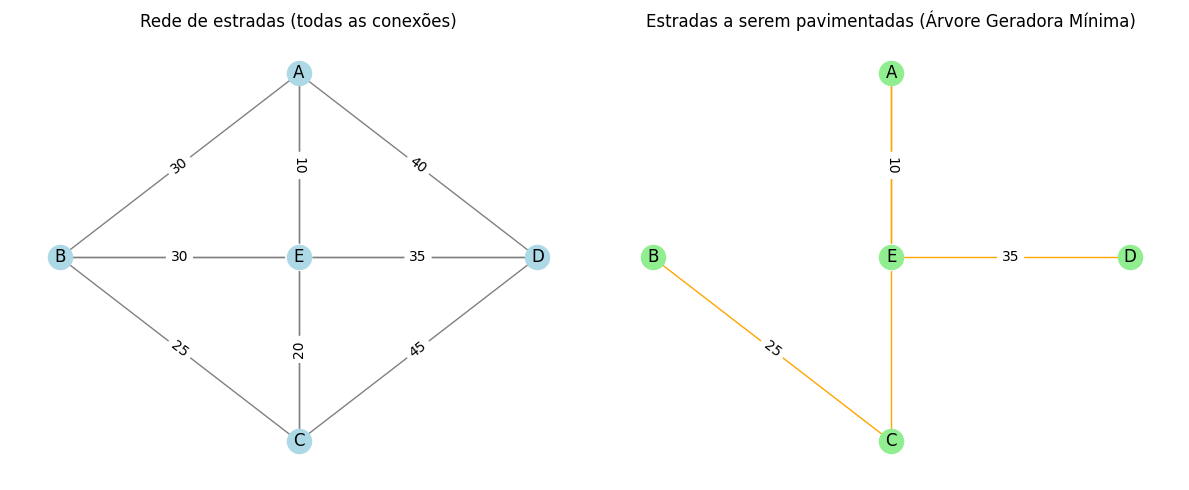

Custo total mínimo de pavimentação: 90


In [164]:
# Exemplo prático: Pavimentação mínima de estradas usando NetworkX

import networkx as nx
import matplotlib.pyplot as plt

# Grafo das localidades e estradas (com distâncias fictícias)
G_estradas = nx.Graph()
G_estradas.add_weighted_edges_from([
    ('A', 'B', 30),
    ('A', 'C', 20),
    ('A', 'D', 40),
    ('A', 'E', 10),
    ('B', 'C', 25),
    ('B', 'D', 40),
    ('B', 'E', 30),
    ('C', 'D', 45),
    ('C', 'E', 20),
    ('D', 'E', 35)
])

# Nova sugestão para pos_estradas (distribuição mais simétrica e clara)
pos_estradas = {
    'A': (0, 2),
    'B': (-2, 0),
    'C': (0, -2),
    'D': (2, 0),
    'E': (0, 0)
}

# Encontrando a árvore geradora mínima (estradas a serem pavimentadas)
mst_estradas = nx.minimum_spanning_tree(G_estradas)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
nx.draw(G_estradas, pos_estradas, with_labels=True, node_color='lightblue', edge_color='gray')
labels_estradas = nx.get_edge_attributes(G_estradas, 'weight')
nx.draw_networkx_edge_labels(G_estradas, pos_estradas, edge_labels=labels_estradas)
plt.title("Rede de estradas (todas as conexões)")

plt.subplot(1, 2, 2)
nx.draw(mst_estradas, pos_estradas, with_labels=True, node_color='lightgreen', edge_color='orange')
labels_mst_estradas = nx.get_edge_attributes(mst_estradas, 'weight')
nx.draw_networkx_edge_labels(mst_estradas, pos_estradas, edge_labels=labels_mst_estradas)
plt.title("Estradas a serem pavimentadas (Árvore Geradora Mínima)")

plt.tight_layout()
plt.show()

# Exibindo o custo total mínimo
custo_total = sum(nx.get_edge_attributes(mst_estradas, 'weight').values())
print(f"Custo total mínimo de pavimentação: {custo_total}")

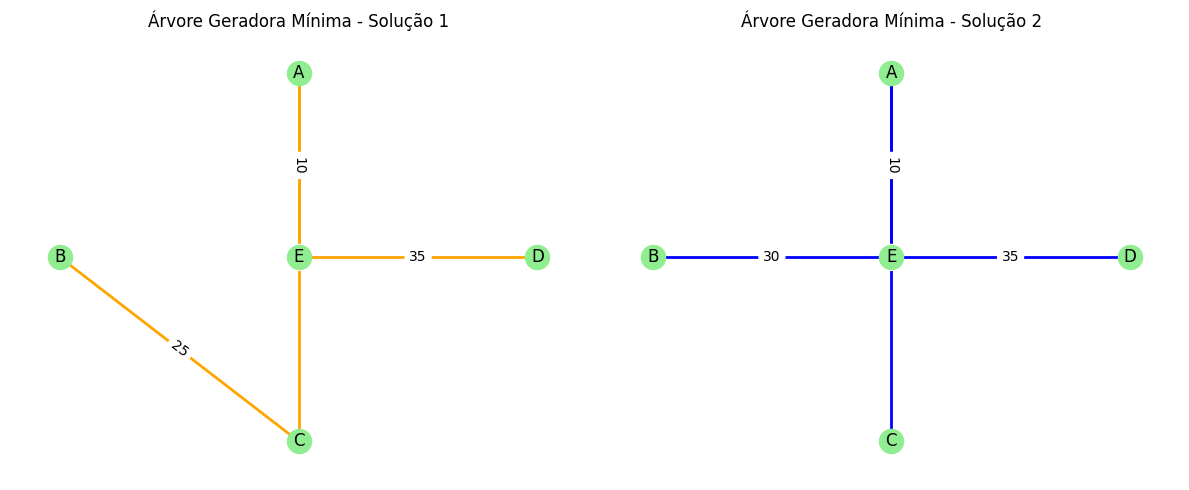

Custo total Solução 1: 90
Custo total Solução 2: 95


In [165]:
# Exemplo: Duas soluções possíveis para a árvore geradora mínima (com mesmo custo)

import networkx as nx
import matplotlib.pyplot as plt

# Grafo das localidades e estradas (mesmo exemplo anterior)
G_estradas = nx.Graph()
G_estradas.add_weighted_edges_from([
    ('A', 'B', 30),
    ('A', 'C', 20),
    ('A', 'D', 40),
    ('A', 'E', 10),
    ('B', 'C', 25),
    ('B', 'D', 40),
    ('B', 'E', 30),
    ('C', 'D', 45),
    ('C', 'E', 20),
    ('D', 'E', 35)
])

pos_estradas = {
    'A': (0, 2),
    'B': (-2, 0),
    'C': (0, -2),
    'D': (2, 0),
    'E': (0, 0)
}

# Solução 1: Árvore geradora mínima encontrada automaticamente
mst1 = nx.minimum_spanning_tree(G_estradas)

# Solução 2: Outra árvore geradora mínima manualmente (trocando uma aresta de mesmo peso)
mst2 = nx.Graph()
mst2.add_weighted_edges_from([
    ('A', 'E', 10),
    ('A', 'C', 20),
    ('B', 'E', 30),
    ('D', 'E', 35)
])

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
nx.draw(mst1, pos_estradas, with_labels=True, node_color='lightgreen', edge_color='orange', width=2)
labels1 = nx.get_edge_attributes(mst1, 'weight')
nx.draw_networkx_edge_labels(mst1, pos_estradas, edge_labels=labels1)
plt.title("Árvore Geradora Mínima - Solução 1")

plt.subplot(1, 2, 2)
nx.draw(mst2, pos_estradas, with_labels=True, node_color='lightgreen', edge_color='blue', width=2)
labels2 = nx.get_edge_attributes(mst2, 'weight')
nx.draw_networkx_edge_labels(mst2, pos_estradas, edge_labels=labels2)
plt.title("Árvore Geradora Mínima - Solução 2")

plt.tight_layout()
plt.show()

print("Custo total Solução 1:", sum(labels1.values()))
print("Custo total Solução 2:", sum(labels2.values()))

# Problema da Árvore Geradora de Custo Mínimo

Este problema é chamado de **Problema da Árvore Geradora de Custo Mínimo** ou **Problema do Mínimo Conector**.

Existem dois algoritmos clássicos para encontrar árvores geradoras de custo mínimo em grafos valorados:
- **Algoritmo de Prim**
- **Algoritmo de Kruskal**

Antes de conhecer os algoritmos, vamos definir o conceito de árvore geradora de custo mínimo.

**Definição 6.7 (Árvore geradora de custo mínimo):**  
Seja $T$ uma árvore geradora com custo total mínimo em um grafo conexo valorado $G$.  
Então, $T$ é chamada de **árvore geradora de custo mínimo** ou **conector mínimo** de $G$.

# Algoritmo de Prim

O algoritmo de Prim é um método eficiente para encontrar uma árvore geradora de custo mínimo em um grafo valorado e conexo.

O pseudocódigo do algoritmo, conforme apresentado em Cormen et al. (2001), implementa o processo de agregação de novos vértices à árvore de forma interessante:

- Em vez da árvore manter controle de suas opções de crescimento “de dentro para fora”, a lógica é invertida.
- Cada vértice ainda não conectado à árvore mantém:
  - O custo mínimo atual para se conectar à árvore (chave).
  - Uma referência para o vértice da árvore ao qual ele se conectaria com esse custo mínimo (predecessor).

Esses dados são mantidos como **predecessor (p)** e **chave** de cada vértice.

O algoritmo também utiliza uma **fila de prioridades** para escolher, em cada iteração, o vértice com o menor custo para se conectar à árvore naquele momento.

O pseudocódigo do algoritmo de Prim utiliza os seguintes elementos:

- **G**: grafo valorado.
- **W**: matriz de custos do grafo.
- **r**: vértice raiz da árvore, escolhido arbitrariamente.
- **p(v)**: predecessor do vértice $v$ na árvore (referência para o vértice ao qual $v$ se conecta com custo mínimo).
- **adj(u)**: conjunto de vértices adjacentes ao vértice $u$.
- **w_{u,v}**: custo da aresta $(u, v)$.
- **chave(v)**: custo mínimo atual para o vértice $v$ se conectar à árvore.
- **Q**: fila de prioridades (mínima) de vértices, tendo como chave o custo mínimo atual para o vértice se conectar à árvore.
- **REMOVE-MINIMO(Q)**: retira da fila e retorna o vértice com menor valor atual de chave.

Esses elementos são fundamentais para a implementação do algoritmo de Prim, permitindo construir a árvore geradora mínima de forma eficiente.

## Algoritmo de Prim - pseudocódigo

O algoritmo de Prim constrói a árvore geradora mínima mantendo, para cada vértice, o menor custo para se conectar à árvore e o seu predecessor.  
A cada iteração, o vértice de menor chave é adicionado à árvore, e as chaves dos seus vizinhos são atualizadas se houver um caminho mais barato.

O laço principal termina quando todos os vértices foram incluídos na árvore.

## Algoritmo de Prim (pseudocódigo simplificado)

```
Algoritmo: PRIM(G, W, r)
    // Inicialização dos atributos dos vértices
    para cada v ∈ V faça
        chave(v) ← ∞
    // Inicialização do vértice raiz
    chave(r) ← 0
    // Inicialização da fila de prioridades Q com todos os vértices
    Q ← V

    enquanto Q ≠ ∅ faça
        u ← REMOVE-MINIMO(Q)
        para cada v adjacente de u faça
            se v ∈ Q e w_{u,v} < chave(v) então
                p(v) ← u
                chave(v) ← w_{u,v}
```

- `G`: grafo valorado
- `W`: matriz de custos do grafo
- `r`: vértice raiz
- `p(v)`: predecessor de v na árvore
- `chave(v)`: custo mínimo atual para v se conectar à árvore
- `Q`: fila de prioridades dos vértices (mínima)
- `REMOVE-MINIMO(Q)`: remove e retorna o vértice de menor chave em Q

Predecessores na AGM (Prim):
A: raiz
B: predecessor = C, chave = 25
C: predecessor = A, chave = 20
D: predecessor = E, chave = 35
E: predecessor = A, chave = 10
Custo total da árvore geradora mínima (Prim): 90


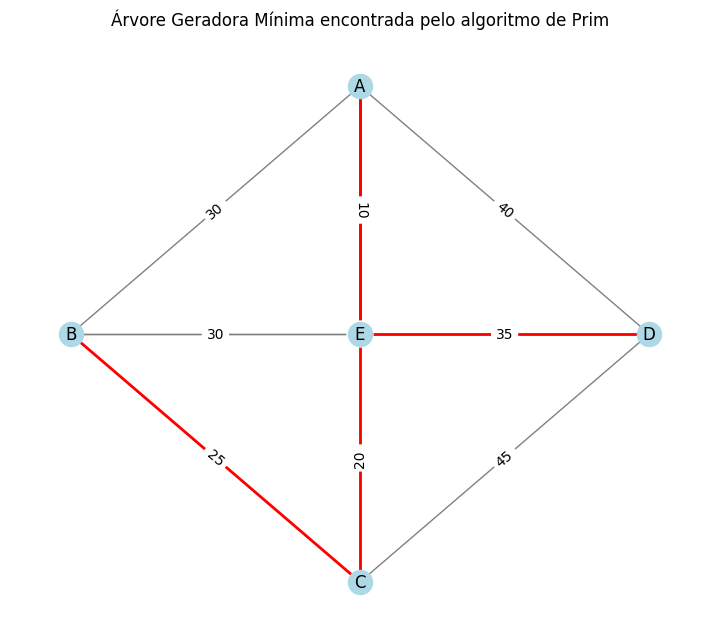

In [166]:

def prim_algoritmo(G, raiz):
    """
    Implementação do algoritmo de Prim conforme o pseudocódigo simplificado.
    Retorna o predecessor de cada vértice e o custo total da árvore geradora mínima.
    """
    # Inicialização
    chave = {v: float('inf') for v in G.nodes()}
    predecessor = {v: None for v in G.nodes()}
    chave[raiz] = 0
    Q = set(G.nodes())

    while Q:
        # REMOVE-MINIMO(Q)
        u = min(Q, key=lambda v: chave[v])
        Q.remove(u)
        for v in G.neighbors(u):
            if v in Q and G[u][v]['weight'] < chave[v]:
                predecessor[v] = u
                chave[v] = G[u][v]['weight']

    # Cálculo do custo total
    custo_total = sum(chave[v] for v in G.nodes())
    return predecessor, chave, custo_total




# Grafo das localidades e estradas (mesmo exemplo anterior)
G_estradas = nx.Graph()
G_estradas.add_weighted_edges_from([
    ('A', 'B', 30),
    ('A', 'C', 20),
    ('A', 'D', 40),
    ('A', 'E', 10),
    ('B', 'C', 25),
    ('B', 'D', 40),
    ('B', 'E', 30),
    ('C', 'D', 45),
    ('C', 'E', 20),
    ('D', 'E', 35)
])

pos_estradas = {
    'A': (0, 2),
    'B': (-2, 0),
    'C': (0, -2),
    'D': (2, 0),
    'E': (0, 0)
}


# Exemplo de uso com o grafo das estradas
predecessor, chave, custo_total = prim_algoritmo(G_estradas, raiz='A')
print("Predecessores na AGM (Prim):")
for v in sorted(G_estradas.nodes()):
    if predecessor[v] is None:
        print(f"{v}: raiz")
    else:
        print(f"{v}: predecessor = {predecessor[v]}, chave = {chave[v]}")
print(f"Custo total da árvore geradora mínima (Prim): {custo_total}")

# Visualização da AGM encontrada por Prim
import matplotlib.pyplot as plt
edges_agm = [(predecessor[v], v) for v in G_estradas.nodes() if predecessor[v] is not None]
plt.figure(figsize=(7, 6))
nx.draw(G_estradas, pos_estradas, with_labels=True, node_color='lightblue', edge_color='gray')
nx.draw_networkx_edges(G_estradas, pos_estradas, edgelist=edges_agm, edge_color='red', width=2)
labels = nx.get_edge_attributes(G_estradas, 'weight')
nx.draw_networkx_edge_labels(G_estradas, pos_estradas, edge_labels=labels)
plt.title("Árvore Geradora Mínima encontrada pelo algoritmo de Prim")
plt.show()

Valores iniciais de predecessor e chave (a partir de 'A'):
A: raiz, chave = 0
B: predecessor = A, chave = 30
C: predecessor = A, chave = 20
D: predecessor = A, chave = 40
E: predecessor = A, chave = 10


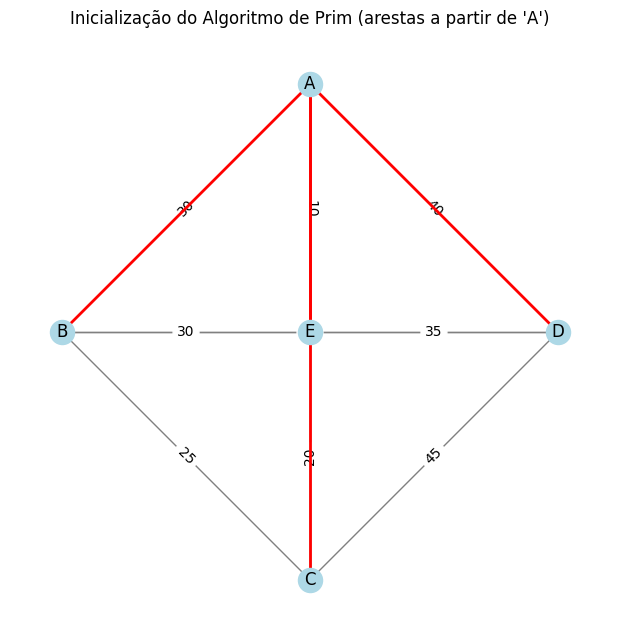

In [167]:

def prim_inicializacao(G, pos, raiz='A'):
    """
    Exibe a inicialização do algoritmo de Prim:
    - Calcula e imprime os predecessores e chaves iniciais.
    - Plota as arestas de menor custo a partir do vértice raiz.
    """
    chave = {v: float('inf') for v in G.nodes()}
    predecessor = {v: None for v in G.nodes()}
    chave[raiz] = 0

    for v in G.nodes():
        if v != raiz:
            predecessor[v] = raiz
            chave[v] = G[raiz][v]['weight']

    print("Valores iniciais de predecessor e chave (a partir de '{}'):".format(raiz))
    for v in sorted(G.nodes()):
        if v == raiz:
            print(f"{v}: raiz, chave = 0")
        else:
            print(f"{v}: predecessor = {predecessor[v]}, chave = {chave[v]}")

    # Visualização
    import matplotlib.pyplot as plt
    plt.figure(figsize=(6, 6))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    edges_iniciais = [(raiz, v) for v in G.nodes() if v != raiz]
    nx.draw_networkx_edges(G, pos, edgelist=edges_iniciais, edge_color='red', width=2)
    plt.title(f"Inicialização do Algoritmo de Prim (arestas a partir de '{raiz}')")
    plt.show()

# Grafo das localidades e estradas (mesmo exemplo anterior)
G_estradas = nx.Graph()
G_estradas.add_weighted_edges_from([
    ('A', 'B', 30),
    ('A', 'C', 20),
    ('A', 'D', 40),
    ('A', 'E', 10),
    ('B', 'C', 25),
    ('B', 'D', 40),
    ('B', 'E', 30),
    ('C', 'D', 45),
    ('C', 'E', 20),
    ('D', 'E', 35)
])

pos_estradas = {
    'A': (0, 2),
    'B': (-2, 0),
    'C': (0, -2),
    'D': (2, 0),
    'E': (0, 0)
}

# Chamada da função de inicialização do Prim
prim_inicializacao(G_estradas, pos_estradas, raiz='A')

In [ ]:

def prim_algoritmo_print_passos(G, raiz):
    """
    Algoritmo de Prim mostrando passo a passo os valores de chave e predecessor (fl)
    para todos os vértices a cada iteração do laço principal, apenas com prints.
    """
    chave = {v: float('inf') for v in G.nodes()}
    predecessor = {v: None for v in G.nodes()}
    chave[raiz] = 0
    Q = set(G.nodes())
    passo = 1

    print(f"{'Passo':<5} {'Q':<20} " + "  ".join([f"{v:^10}" for v in sorted(G.nodes())]))
    print(f"{'':<5} {'':<20} " + "  ".join([f"{'chave':^5} {'fl':^4}" for _ in sorted(G.nodes())]))

    while Q:
        u = min(Q, key=lambda v: (chave[v], v))
        Q.remove(u)

        print(f"{passo:<5} {str(sorted(Q)):<20} " + "  ".join(
            [f"{chave[v]:>5.0f} {predecessor[v] if predecessor[v] is not None else 'raiz':>4}" for v in sorted(G.nodes())]
        ))

        for v in sorted(G.neighbors(u)):
            if v in Q and G[u][v]['weight'] < chave[v]:
                predecessor[v] = u
                chave[v] = G[u][v]['weight']
        passo += 1

    custo_total = sum(chave[v] for v in G.nodes())
    print("\nResultado final:")
    for v in sorted(G.nodes()):
        fl = predecessor[v] if predecessor[v] is not None else 'raiz'
        print(f"{v}: chave = {chave[v]}, fl = {fl}")
    print(f"Custo total da árvore geradora mínima (Prim): {custo_total}")
    return predecessor, chave, custo_total

# Exemplo de uso com o grafo das estradas
predecessor, chave, custo_total = prim_algoritmo_print_passos(G_estradas, raiz='A')

# Visualização da AGM encontrada por Prim
edges_agm = [(predecessor[v], v) for v in G_estradas.nodes() if predecessor[v] is not None]
plt.figure(figsize=(7, 6))
nx.draw(G_estradas, pos_estradas, with_labels=True, node_color='lightblue', edge_color='gray')
nx.draw_networkx_edges(G_estradas, pos_estradas, edgelist=edges_agm, edge_color='red', width=2)
labels = nx.get_edge_attributes(G_estradas, 'weight')
nx.draw_networkx_edge_labels(G_estradas, pos_estradas, edge_labels=labels)
plt.title("Árvore Geradora Mínima encontrada pelo algoritmo de Prim")
plt.show()

## Passos detalhados do algoritmo de Prim

O algoritmo de Prim constrói uma árvore geradora mínima (AGM) de um grafo valorado e conexo, escolhendo sempre a aresta de menor peso que conecta um novo vértice à árvore já construída. Veja o passo a passo detalhado:

1. **Inicialização**
   - Para cada vértice $v$, define `chave[v] = ∞` (infinito) e `predecessor[v] = None`.
   - Para o vértice inicial (raiz, por exemplo, 'A'), define `chave[raiz] = 0`.
   - Todos os vértices são inseridos em um conjunto $Q$ (os que ainda não estão na árvore).

2. **Laço principal**
   - Enquanto $Q$ não está vazio:
     - Escolhe o vértice $u$ em $Q$ com menor valor de `chave[u]`. Em caso de empate, escolhe o vértice de menor ordem alfabética.
     - Remove $u$ de $Q$ (agora $u$ faz parte da árvore).
     - Para cada vizinho $v$ de $u$ ainda em $Q$:
       - Se o peso da aresta $(u, v)$ for menor que `chave[v]`, atualiza:
         - `chave[v] = peso(u, v)`
         - `predecessor[v] = u`
     - (Opcional: imprime ou armazena os valores de `chave` e `predecessor` de todos os vértices neste passo.)

3. **Finalização**
   - Quando $Q$ estiver vazio, a árvore está pronta.
   - As arestas da AGM são dadas por $(predecessor[v], v)$ para cada $v$ cujo predecessor não é None.
   - O custo total da AGM é a soma dos valores de `chave[v]` para todos os vértices.

**Resumo visual dos passos:**
- No início, só o vértice raiz está na árvore (chave 0).
- A cada passo, um novo vértice é adicionado, sempre pela aresta de menor custo possível.
- O algoritmo nunca forma ciclos.
- O processo termina quando todos os vértices foram incluídos.

**Exemplo de tabela de acompanhamento:**

| Passo | Q (restantes) | chave(A) fl(A) | chave(B) fl(B) | chave(C) fl(C) | ... |
|-------|---------------|----------------|----------------|----------------|-----|
|   1   | [B,C,D,E]     |   0 raiz       |  30  A         |  20  A         | ... |
|   2   | [B,D,E]       |   0 raiz       |  25  C         |  20  A         | ... |
| ...   | ...           | ...            | ...            | ...            | ... |

Assim, você pode acompanhar, a cada iteração, como a árvore cresce e quais vértices estão sendo conectados, sempre pelo menor custo disponível.